Author - Tridev Parashar, Preethi Pothireddy, Elisavet Demetriou, Rajat Sawant, Mihir Salunke

Date - 14 Nov 2022

Description - The following python notebook aims to check pay equity across positions

### Load Modules and Import Dataset

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#Read CSV
df=pd.read_csv('HRDataset_v14.csv.xls')

In [3]:
#Data Filtering and Cleaning

#1.Seperating Whites and Non whites
df['RaceDesc'] = df['RaceDesc'].replace(['Asian','Black or African American','Hispanic','American Indian or Alaska Native','Two or more races'], 'Non-white')
#2. Data Cleaning
df['Position'] = df['Position'].replace(['Data Analyst '], 'Data Analyst' )
#3. Concatinate Race and Sex
df['X'] = df['RaceDesc'] + df['Sex']

### Using ANOVA to determine appropriate fit of variables

In [4]:
mod = ols('Salary ~ Position + RaceDesc + Sex', data=df).fit()

In [5]:
aov_table = sm.stats.anova_lm(mod, typ=2)

In [6]:
print(aov_table)

                sum_sq     df           F         PR(>F)
Position  1.833514e+11   30.0  157.881640  2.666751e-156
RaceDesc  8.103294e+07    1.0    2.093294   1.490734e-01
Sex       5.282194e+05    1.0    0.013645   9.070925e-01
Residual  1.076158e+10  278.0         NaN            NaN


### IT/IS Department - Data Transformation and Plotting

In [7]:
#Filtering IT/IS Department
df1=df[df['Department'] == 'IT/IS']
#GroupingBy
A=df1.groupby(['X','Position'])[['Salary']].mean()
A1=A.loc[['Non-whiteF']]
A2=A.loc[['Non-whiteM ']]
A3=A.loc[['WhiteF']]
A4=A.loc[['WhiteM ']]


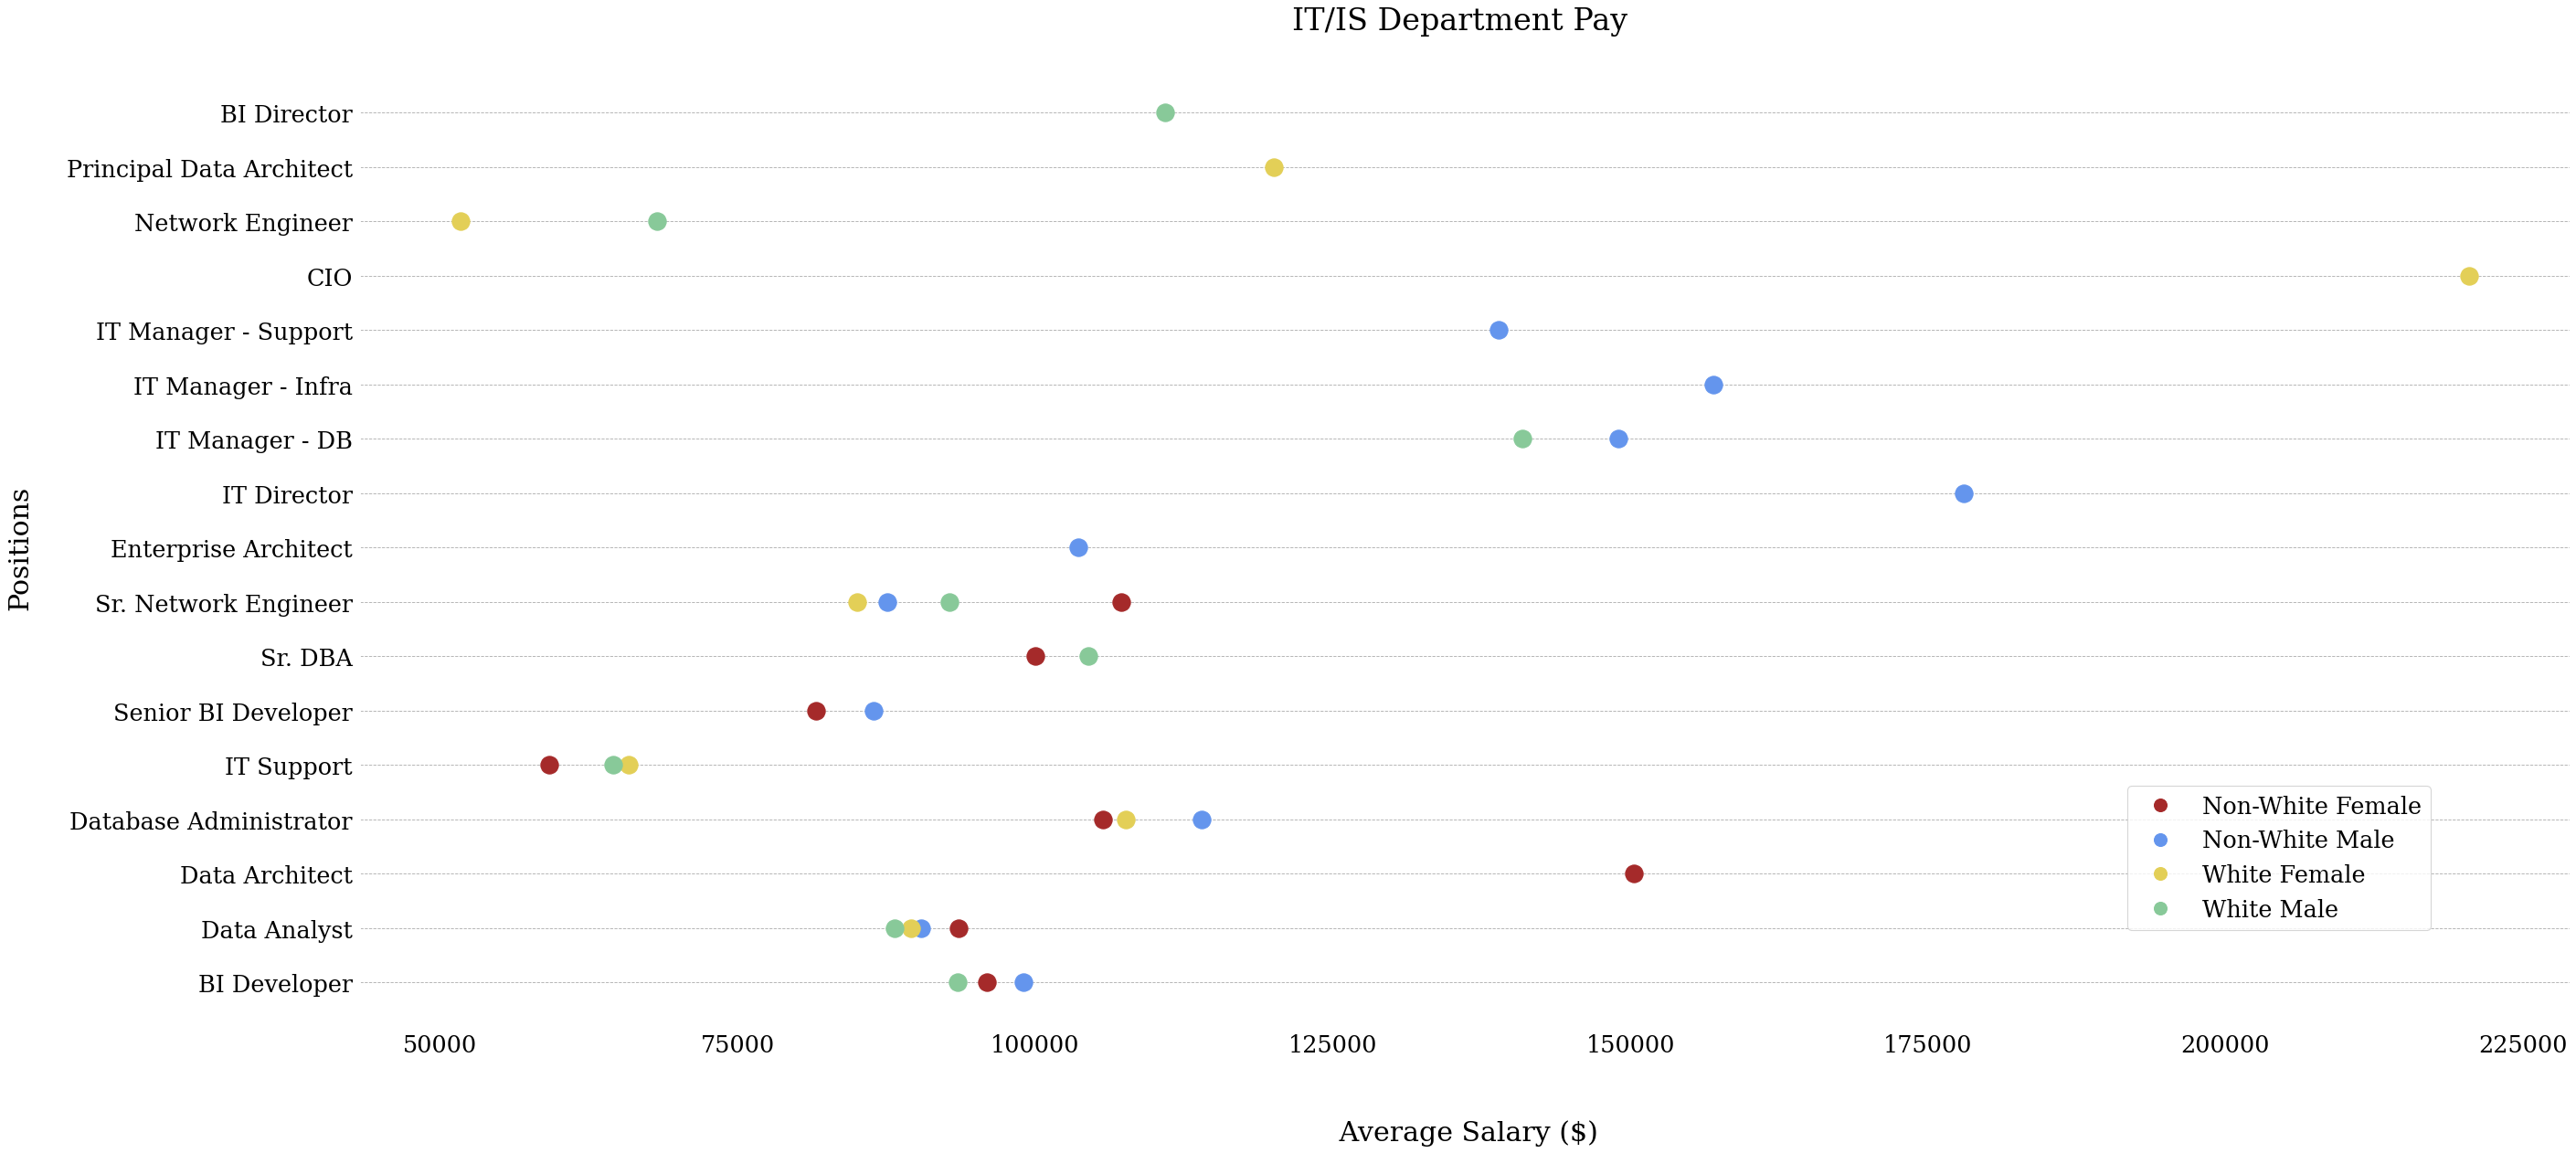

In [8]:
#Plotting the Data
plt.rcParams['font.family']='Serif'
plt.rc('xtick', labelsize=23) 
plt.rc('ytick', labelsize=23)

fig1, ax1 = plt.subplots(figsize=(39,17), dpi= 80)
plt.title('IT/IS Department Pay \n',size=30)
plt.scatter(A1.Salary.values, A1.index.get_level_values(1),color='#A52A2A',s=300)
plt.scatter(A2.Salary.values, A2.index.get_level_values(1),color='#6495ED',s=300)
plt.scatter(A3.Salary.values, A3.index.get_level_values(1),color='#E3CF57',s=300)
plt.scatter(A4.Salary.values, A4.index.get_level_values(1),color='#88c999',s=300)
custom = [Line2D([], [], marker='.', markersize=25, color='#A52A2A', linestyle='None'),
          Line2D([], [], marker='.', markersize=25, color='#6495ED', linestyle='None'),
          Line2D([], [], marker='.', markersize=25, color='#E3CF57', linestyle='None'),
          Line2D([], [], marker='.', markersize=25, color='#88c999', linestyle='None')]
plt.legend(custom, ['Non-White Female', 'Non-White Male','White Female','White Male'], loc=(0.8,0.1), fontsize=23)
plt.grid(axis='y',ls='--')
plt.xlabel('\n\n Average Salary ($)',size=27)
plt.ylabel('Positions\n',size=27)
ax1.spines[['bottom','top','right','left']].set_color('white')
ax1.tick_params(left = False)
ax1.tick_params(bottom = False)
ax1.set_axisbelow(True)
plt.savefig('IT Department Pay.png')
plt.show()


### Other Departments - Data Transformation and Plotting

In [9]:
#Filtering all other departments
df2=df[df['Department'] != 'IT/IS']
#Categorizing the Data
Categories=['Software Engineer','Software Engineering Manager','Area Sales Manager','Sales Manager','Director of Sales','Accountant I','Sr. Accountant','Administrative Assistant','Shared Services Manager','Production Technician I','Production Technician II','Production Manager','Director of Operations','President & CEO']
Category_Position = pd.api.types.CategoricalDtype(categories=Categories, ordered=True)
df2['Position'] = df2['Position'].astype(Category_Position) 
#Grouping By
B=df2.groupby(['X','Position'])[['Salary']].mean()
B1=B.loc[['Non-whiteF']]
B2=B.loc[['Non-whiteM ']]
B3=B.loc[['WhiteF']]
B4=B.loc[['WhiteM ']]

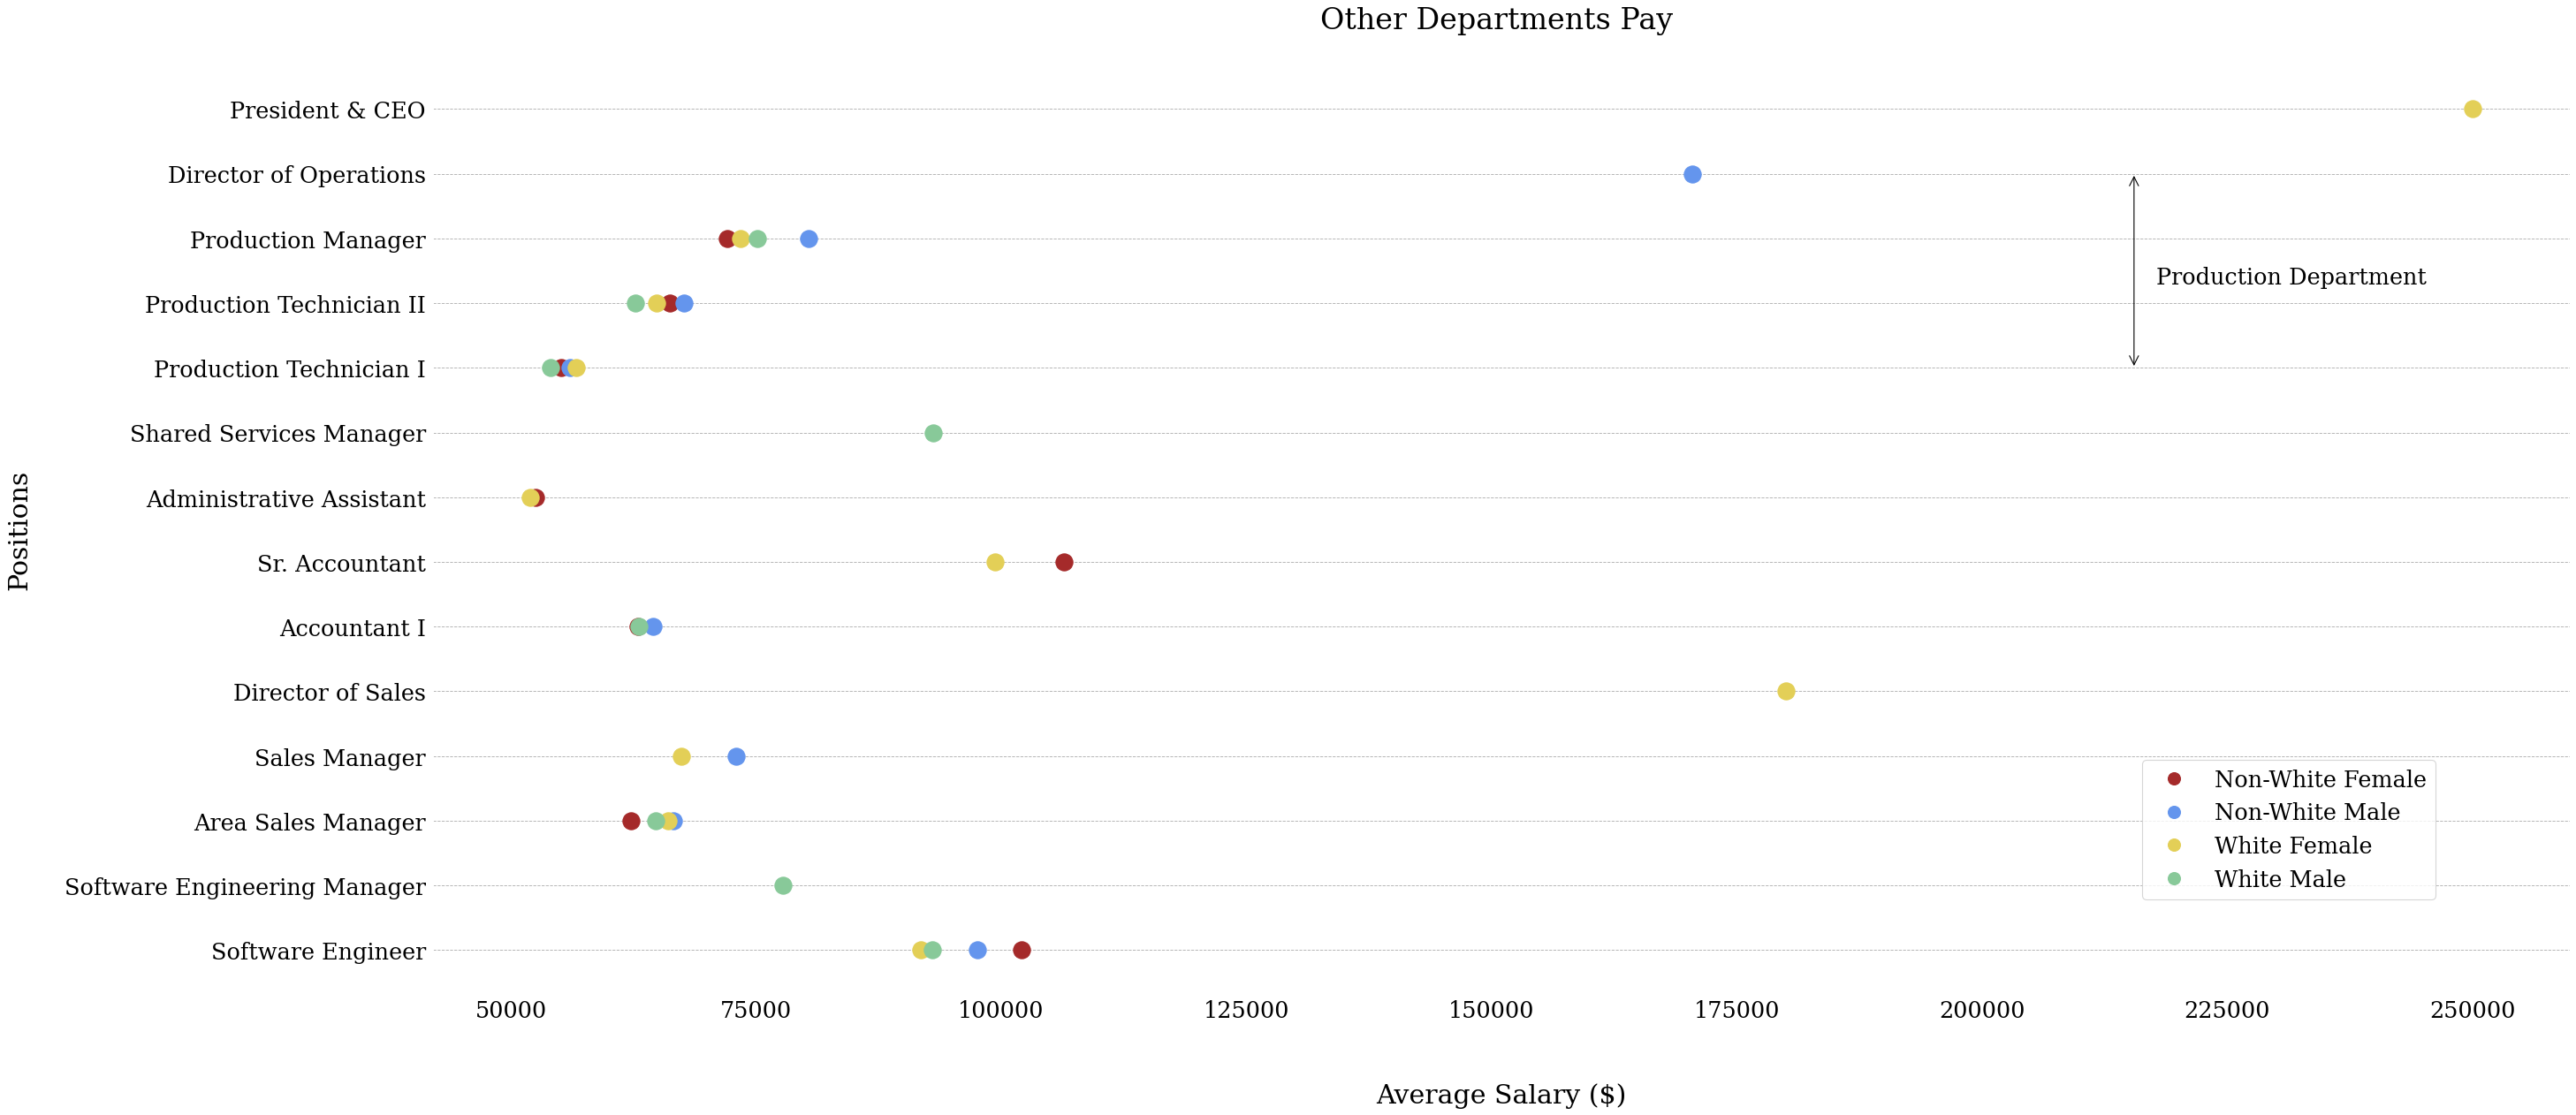

<Figure size 640x480 with 0 Axes>

In [10]:
#Plotting the data
plt.rcParams['font.family']='Serif'
plt.rc('xtick', labelsize=23) 
plt.rc('ytick', labelsize=23)

fig2, ax2 = plt.subplots(figsize=(39,17), dpi= 80)
plt.title('Other Departments Pay \n',size=30)
plt.scatter(B1.Salary.values, B1.index.get_level_values(1),color='#A52A2A',s=300)
plt.scatter(B2.Salary.values, B2.index.get_level_values(1),color='#6495ED',s=300)
plt.scatter(B3.Salary.values, B3.index.get_level_values(1),color='#E3CF57',s=300)
plt.scatter(B4.Salary.values, B4.index.get_level_values(1),color='#88c999',s=300)
custom = [Line2D([], [], marker='.', markersize=25, color='#A52A2A', linestyle='None'),
          Line2D([], [], marker='.', markersize=25, color='#6495ED', linestyle='None'),
          Line2D([], [], marker='.', markersize=25, color='#E3CF57', linestyle='None'),
          Line2D([], [], marker='.', markersize=25, color='#88c999', linestyle='None')]
plt.legend(custom, ['Non-White Female', 'Non-White Male','White Female','White Male'], loc=(0.8,0.1), fontsize=23)
ax2.spines[['bottom','top','right','left']].set_color('white')
plt.annotate('',xy=(215500,9),xytext=(215500,12),size=23,arrowprops=dict(arrowstyle='<->',lw=1,facecolor='black'),annotation_clip=False)
plt.text(217777,10.3,"Production Department",fontsize=23)
plt.grid(axis='y',ls='--')
plt.xlabel('\n\nAverage Salary ($)',size=27)
plt.ylabel('Positions\n',size=27)
ax2.set_axisbelow(True)
ax2.tick_params(left = False)
ax2.tick_params(bottom = False)
plt.show()
plt.savefig('Other Departments Pay.png')